# Assignment 2(due on 11/08)

## Student:彭子豪（12332300），Gtihub：shsjpzh
## 批改人：张鹏


## 得分：47/50

### 1 Significant earthquakes since 2150 B.C.

In [2]:
# 1. Significant earthquakes since 2150 B.C.
#1.1
import pandas as pd

# 将文件作为DataFrame读取
Sig_Eqs = pd.read_csv('earthquakes-2023-10-26_10-08-26_+0800.tsv',delimiter='\t')

# 按国家对数据进行分组，得到每个国家的死亡总数
deaths_by_country = Sig_Eqs.groupby('Country')['Deaths'].sum()

# 对数据进行降序排序，得到死亡总数最高的前十个国家
top_10_countries = deaths_by_country.sort_values(ascending=False).head(10)

# 打印结果
print(top_10_countries)

Country
CHINA         2075045.0
TURKEY        1188881.0
IRAN          1011449.0
ITALY          498478.0
SYRIA          439224.0
HAITI          323478.0
AZERBAIJAN     317219.0
JAPAN          279085.0
ARMENIA        191890.0
PAKISTAN       145083.0
Name: Deaths, dtype: float64


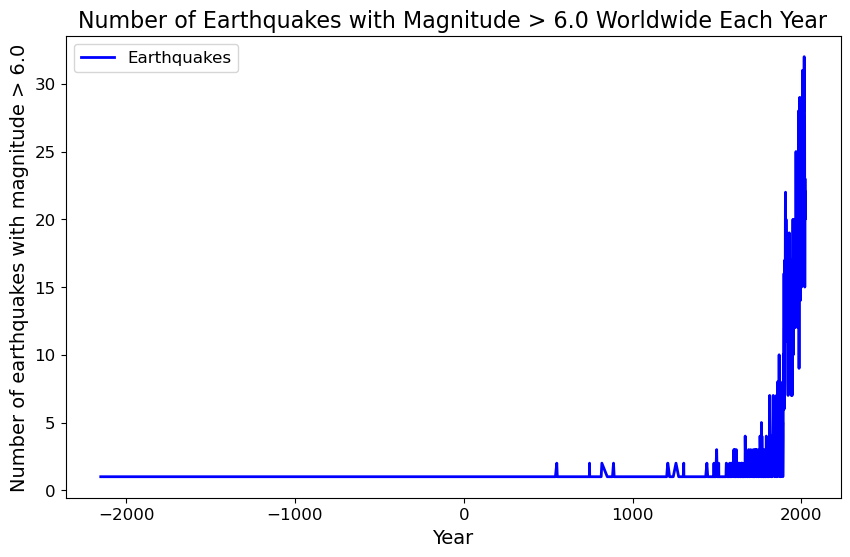

In [3]:
#1.2
import matplotlib.pyplot as plt

# 筛选出震级大于6.0的地震
large_quakes = Sig_Eqs[Sig_Eqs['Mag'] > 6.0]

# 按年份对数据进行分组，并得到每年的地震次数
quakes_by_year = large_quakes.groupby('Year')['Mag'].count()

#将结果写入excel
quakes_by_year.to_excel('每年震级超过6.0的全球地震数量.xlsx')


# 绘图
plt.figure(figsize=(10, 6))
plt.plot(quakes_by_year.index, quakes_by_year.values, color='blue', linewidth=2)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of earthquakes with magnitude > 6.0', fontsize=14)
plt.title('Number of Earthquakes with Magnitude > 6.0 Worldwide Each Year', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(['Earthquakes'], loc='upper left', fontsize=12)
plt.show()

In [4]:
#1.3
import pandas as pd


# 将 DataFrame 中的空值替换为 9999，“9999”代表数据缺失
Sig_Eqs.fillna("9999", inplace=True)



def CountEq_LargestEq(country):
    # 过滤仅包括给定国家的地震数据
    country_quakes = Sig_Eqs[Sig_Eqs['Country'] == country]

    # 计算自公元前2150年以来该国的地震总数
    total_quakes = len(country_quakes)

    # 找出这个国家有史以来最大的地震

    largest_eq = country_quakes.loc[country_quakes['Mag'].astype("float64").idxmax()]

     # 将月份和日期转换为字符串
    largest_eq_date = str(int(largest_eq['Year'])) + "年" + str(int(largest_eq['Mo'])) + "月" + str(int(largest_eq['Dy'])) + "日"


    return total_quakes, largest_eq_date


# 获取唯一值
countries = Sig_Eqs['Country'].unique()

# 计算每个国家的地震总数和最大地震发生的日期
results = []
for country in countries:
    total_quakes, largest_eq_date = CountEq_LargestEq(country)
    results.append((country, total_quakes, largest_eq_date))

# 按最终的地震总数降序排列结果
results_sorted = sorted(results, key=lambda x: x[1], reverse=True)

 #将结果写作表格的形式
results_df = pd.DataFrame(results_sorted, columns=['国家', '地震总数（次）', '最大地震发生日期'])

#删除'国家'列中9999所在的行
results_df = results_df[results_df['国家'] != '9999']

#将"最大地震发生日期"列的数据中的'9999'替换为'/'
results_df['最大地震发生日期'] = results_df['最大地震发生日期'].str.replace('9999', '/')

#将数据保存为excel
results_df.to_excel('各国地震总数及最大地震发生日期.xlsx')

results_df

,国家,地震总数（次）,最大地震发生日期
0,CHINA,620,-47年4月17日
1,JAPAN,414,1545年2月7日
2,INDONESIA,411,1629年8月1日
3,IRAN,384,662年4月26日
4,TURKEY,335,-282年/月/日
...,...,...,...
152,BURUNDI,1,2004年2月24日
153,CZECH REPUBLIC,1,2008年11月22日
154,MADAGASCAR,1,2017年1月11日
155,ZAMBIA,1,2017年2月24日


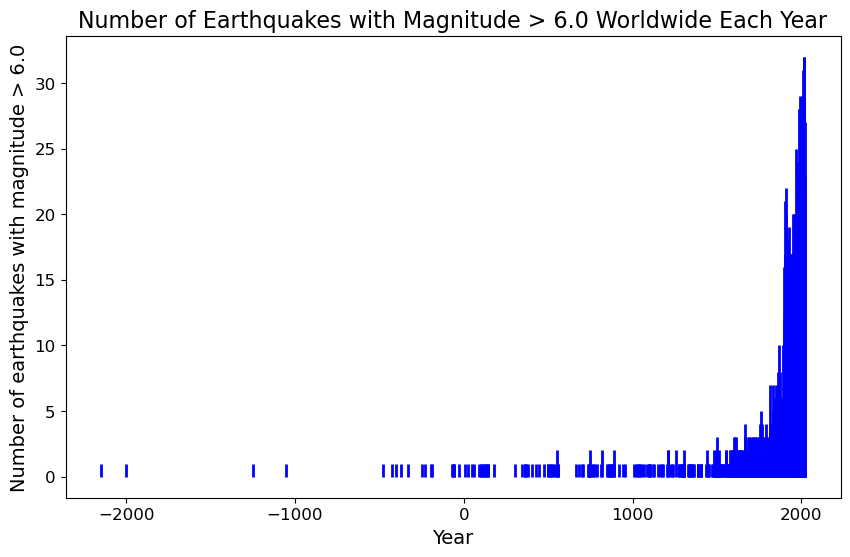

In [5]:
plt.figure(figsize=(10, 6))
plt.vlines(quakes_by_year.index, ymin=0, ymax=quakes_by_year.values, color='blue', linewidth=2)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of earthquakes with magnitude > 6.0', fontsize=14)
plt.title('Number of Earthquakes with Magnitude > 6.0 Worldwide Each Year', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)

# Displaying the plot
plt.show()

### 第一题代码运行正常，可以输出正确结果，报告中也展示了输出内容和详细的结果的分析，也针对问题给出文字分析。但第二问绘图有一点点问题，建议绘制竖线图，见上面代码助教添加代码


### 得分：24/25
### --------------------------------------------------------------------------------------------

###  2. Wind speed in Shenzhen during the past 10 years

/tmp/ipykernel_437877/3728540066.py:3: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  Shenzhen_windspeed = pd.read_csv('2281305.csv')


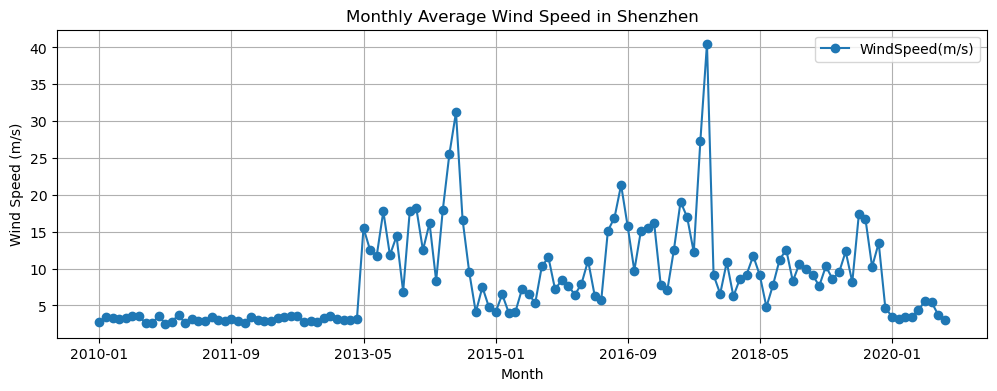

In [6]:
#2 Wind speed in Shenzhen during the past 10 years
import pandas as pd
Shenzhen_windspeed = pd.read_csv('2281305.csv')

#根据用户指南提取WND列中与风速有关的信息，以','分隔为标准，并将这两列单独加到表格最后
Shenzhen_windspeed['WindSpeed(m/s)'] = Shenzhen_windspeed['WND'].str.split(',', expand=True)[3]   
Shenzhen_windspeed['DataQuality_WindSpeed'] = Shenzhen_windspeed['WND'].str.split(',', expand=True)[4]
Shenzhen_windspeed.head()
#P提取DATE列中的前七位，将其作为新列
Shenzhen_windspeed['Month'] = Shenzhen_windspeed['DATE'].str.slice(0, 7)

# 先将列中的数据转化为数值型数据
Shenzhen_windspeed['WindSpeed(m/s)'] = pd.to_numeric(Shenzhen_windspeed['WindSpeed(m/s)'], errors='coerce')

#由于scaling factor为10，因此将数据除以10后才是实际的风速数据
Shenzhen_windspeed['WindSpeed(m/s)'] = round(Shenzhen_windspeed['WindSpeed(m/s)'] / 10, 2)

# 按月计算平均风速
monthly_avg_wind_speed = Shenzhen_windspeed.groupby('Month')['WindSpeed(m/s)'].mean()

#将结果写入excel
monthly_avg_wind_speed.to_excel('深圳市近十年月均风速.xlsx')

import matplotlib.pyplot as plt
#绘图
monthly_avg_wind_speed.plot(figsize=(12, 4), marker='o',title='Monthly Average Wind Speed in Shenzhen')
plt.xlabel('Month')
plt.ylabel('Wind Speed (m/s)')   
plt.grid(True)
plt.legend()
plt.show()

/tmp/ipykernel_437877/256303067.py:6: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  WDS = pd.read_csv('2281305.csv')[['DATE','WND']]


Text(0, 0.5, 'Wind speed/m¡¤${s^-1}$')

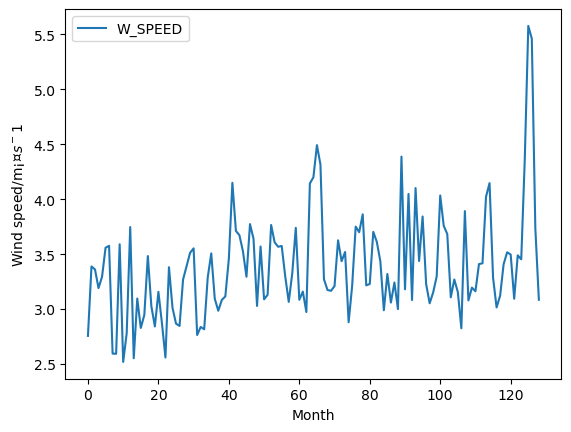

In [7]:
#助教添加
import numpy as np
import pandas as pd
import matplotlib as plt

WDS = pd.read_csv('2281305.csv')[['DATE','WND']]
WDS = pd.merge(WDS,WDS['WND'].str.split(',', expand=True),left_index=True,right_index=True)
WDS['DATE'] = pd.to_datetime(WDS['DATE'])
WDS = WDS.drop(columns=['WND',0,1,2])
WDS.columns = ['DATE','W_SPEED','SPEED_QLT']
WDS = WDS.set_index('DATE')

np.unique(WDS['W_SPEED'])
np.unique(WDS['SPEED_QLT'])
WDS = WDS[WDS['W_SPEED']!='9999']
WDS = WDS[WDS['SPEED_QLT']!='9']
WDS = WDS.astype('int')

WDS_M = WDS['W_SPEED'].resample('M').mean()
WDS_M = WDS_M.reset_index(drop=False)
WDS_M['DATE'] = WDS_M['DATE'].dt.strftime('%Y-%m')
WDS_M.set_index('DATE')
WDS_M['W_SPEED'] = WDS_M['W_SPEED']/10
p = WDS_M.plot();
p.set_xlabel('Month');
p.set_ylabel('Wind speed/m¡¤${s^-1}$')

### 第二题代码运行正常，可以输出，但是结果部分月均风速变化太大不符合常理，这其中的问题很可能是没有对数据进行清洗造成的。“9999”的不是风速值，只是无效值的另一个表示方法，需要替换成 Nan。

### 得分9/10
### ---------------------------------------------------------------------------------------------

###  3. Explore a data set

In [8]:
# 3. Explore a dataset
#3.1 Load the csv, XLS, or XLSX file, and clean possible data points with missing values or bad quality
import pandas as pd

# 将文件作为DataFrame读取
Shanghai = pd.read_csv('Shanghai_T_1991-2023.csv',header=0)
#由于最后两列全为空值，先删除最后两列
Shanghai.drop(labels=['SNOW','SNWD'],axis=1,inplace=True) 
#再删除剩余列中空值所在的行
Shanghai.dropna(inplace=True)

Shanghai

,Date,TAVG (Degrees Fahrenheit),TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches)
0,1991/1/1,44,49.0,42.0,0.12
1,1991/1/2,40,42.0,38.0,0.00
2,1991/1/3,41,45.0,38.0,0.00
3,1991/1/4,37,40.0,33.0,0.01
4,1991/1/5,35,41.0,31.0,0.02
...,...,...,...,...,...
11956,2023/10/19,71,82.0,59.0,0.06
11957,2023/10/20,64,82.0,58.0,0.05
11958,2023/10/21,61,70.0,51.0,0.00
11959,2023/10/22,63,74.0,51.0,0.00


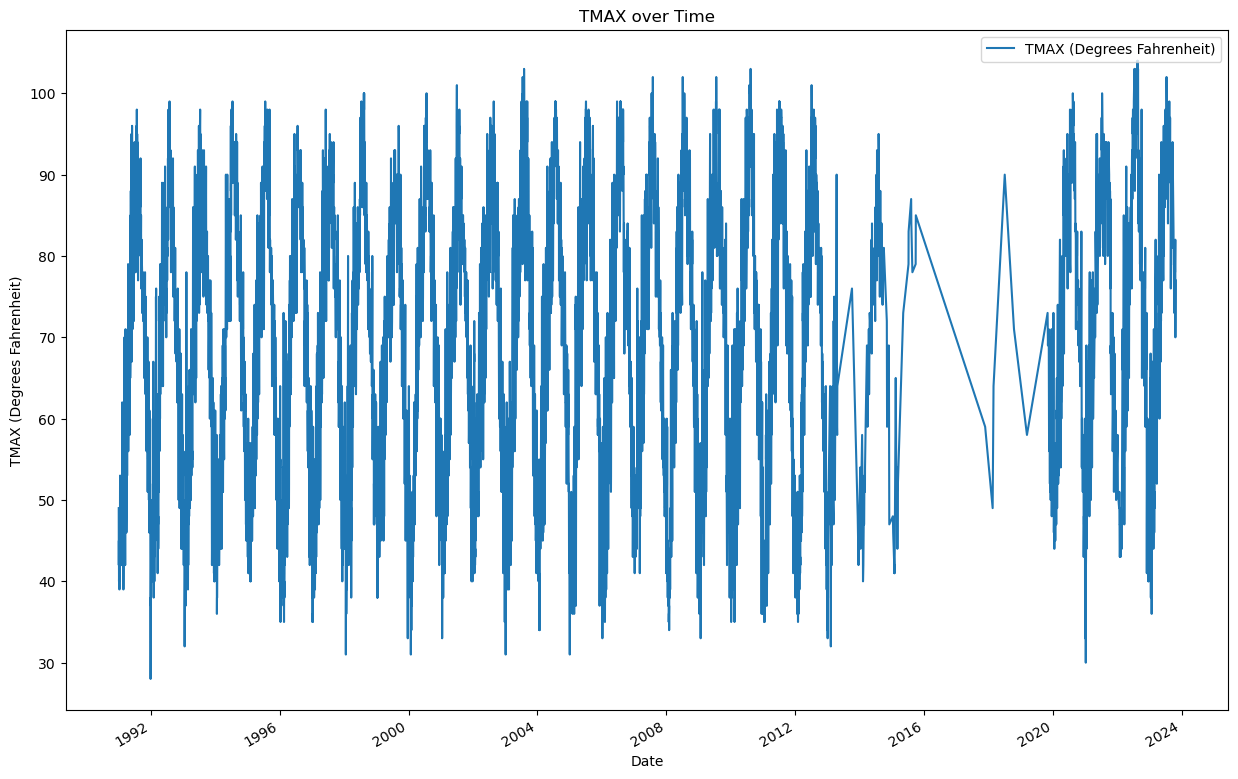

In [9]:
#3.2 Plot the time series of a certain variable.
import matplotlib.pyplot as plt
Shanghai['Date']=pd.to_datetime(Shanghai['Date'])  
Shanghai.set_index('Date',inplace=True)
plt.figure(figsize=(15, 10))
Shanghai["TMAX (Degrees Fahrenheit)"].plot()
plt.title('TMAX over Time')
plt.xlabel('Date')
plt.legend(loc='upper right')
plt.ylabel('TMAX (Degrees Fahrenheit)')
plt.show()


In [8]:
mp

,PRCP,Month
DATE,,
1951-01-31,82.0,1
1951-02-28,102.0,2
1951-03-31,14.0,3
1951-04-30,9.0,4
1951-05-31,1459.0,5
...,...,...
2023-07-31,3372.0,7
2023-08-31,909.0,8
2023-09-30,1196.0,9


In [10]:
 #3.3 Conduct at least 5 simple statistical checks with the variable, and report your findings.
# Assuming 'Shanghai' DataFrame is already loaded and cleaned

# 计算平均值
mean = round(Shanghai['TMAX (Degrees Fahrenheit)'].mean(), 2)
print("平均值: ", mean)

# 计算中位数
median = round(Shanghai['TMAX (Degrees Fahrenheit)'].median(), 2)
print("中位数: ", median)

# 计算众数
mode = Shanghai['TMAX (Degrees Fahrenheit)'].mode()
print("众数: ", round(mode[0], 2))  # mode() returns a Series, get the first mode with mode[0]

# 计算方差
variance = round(Shanghai['TMAX (Degrees Fahrenheit)'].var(), 2)
print("方差: ", variance)

# 计算标准差
std_dev = round(Shanghai['TMAX (Degrees Fahrenheit)'].std(), 2)
print("标准差: ", std_dev)

平均值:  69.7
中位数:  72.0
众数:  80.0
方差:  267.89
标准差:  16.37


### 第三题代码输出结果正确，也在报告中展现了输出结果。但最后一小问没有对结果的分析
### 得分14/15